In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#adding 26 column names and reading the .txt file
dep_var=['RUL']
input_file_column_names=['e_id','cycle','oprsetting1','oprsetting2','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21']
path="/content/drive/MyDrive/RUL_Dataset/train.txt"
train= pd.read_csv(path,delim_whitespace=True, names=input_file_column_names)
print('DATA SHAPE: ', train.shape)

DATA SHAPE:  (45918, 26)


In [ ]:
#showing first five rows of the data before adding the rul column
train.head()

,e_id,cycle,oprsetting1,oprsetting2,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [ ]:
#showing last five rows of the data before adding the rul column
train.tail()

,e_id,cycle,oprsetting1,oprsetting2,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761
45917,218,133,25.0071,0.6216,80.0,462.54,537.46,1274.65,1068.77,7.05,...,164.18,2027.75,7859.24,10.9748,0.02,310,1915,84.93,14.19,8.5120


In [ ]:
train.describe()

,e_id,cycle,oprsetting1,oprsetting2,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


In [ ]:
train['RUL']=''

In [ ]:
train.head()

,e_id,cycle,oprsetting1,oprsetting2,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,


In [ ]:
input_file_column_names=['e_id','cycle','oprsetting1','oprsetting2','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21']
path="/content/drive/MyDrive/RUL_Dataset/final_test.txt"
test = pd.read_csv(path,delim_whitespace=True, names=input_file_column_names)
print('DATA SHAPE: ', test.shape)

DATA SHAPE:  (55156, 26)


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,55156.0,221.334488,124.539458,1.0000,116.0000,223.00000,329.000000,435.0000
cycle,55156.0,77.962035,55.441894,1.0000,32.0000,68.00000,115.000000,298.0000
oprsetting1,55156.0,24.005642,14.774840,0.0000,10.0045,25.00140,41.998100,42.0080
oprsetting2,55156.0,0.571366,0.310471,0.0000,0.2506,0.70000,0.840000,0.8420
oprsetting3,55156.0,49.078976,32.503164,0.0000,20.0000,40.00000,80.000000,100.0000
sensor1,55156.0,472.860462,26.418984,445.0000,445.0000,462.54000,491.190000,518.6700
sensor2,55156.0,579.429345,37.336312,535.5100,549.4700,555.80000,607.250000,644.0800
sensor3,55156.0,1418.007963,106.056670,1245.5700,1351.5000,1367.07000,1498.120000,1607.6100
sensor4,55156.0,1202.571341,119.118778,1029.0300,1122.2600,1133.82000,1305.300000,1430.9500
sensor5,55156.0,8.028791,3.620938,3.9100,3.9100,7.05000,10.520000,14.6200


In [ ]:
test=test.drop([ 'sensor10', 'sensor15', 'sensor16',  'oprsetting2'], axis=1)

In [ ]:
test.head(5)

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor9,sensor11,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,20.0,489.05,605.02,1498.72,1304.90,10.52,15.49,...,8770.87,45.47,371.83,2388.12,8128.58,371,2319,100.0,28.52,17.0653
1,1,2,0.0015,100.0,518.67,642.69,1592.90,1405.35,14.62,21.61,...,9046.61,47.46,521.88,2388.09,8128.07,392,2388,100.0,38.95,23.3609
2,1,3,34.9986,60.0,449.44,555.49,1357.71,1127.52,5.48,8.00,...,8340.55,41.80,182.97,2387.92,8060.07,333,2223,100.0,14.91,8.8185
3,1,4,20.0031,0.0,491.19,607.62,1479.86,1257.25,9.35,13.65,...,8721.01,44.22,315.29,2388.09,8060.00,365,2324,100.0,24.35,14.7075
4,1,5,42.0041,40.0,445.00,549.69,1354.17,1124.17,3.91,5.72,...,8318.64,41.98,130.50,2387.84,8080.66,331,2212,100.0,10.67,6.4837


In [ ]:
ntest = test.copy()

In [ ]:
# e_id = df['e_id'].unique()
# df['MAX_CYCLE']=''
# a = df.groupby ('e_id').size()
# a
# df.loc[df['e_id']==1,'MAX_CYCLE']=a[1]
# df

In [ ]:
#method1 - LINEAR METHOD
e_id = train['e_id'].unique()

a = train.groupby ('e_id').size()
for i in range(218):
  train.loc[train['e_id']==i+1,'MAX_CYCLE']=a[i+1]
train['RUL']=train['MAX_CYCLE']-train['cycle']
train






,e_id,cycle,oprsetting1,oprsetting2,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,222.0,223.0
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,221.0,223.0
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,220.0,223.0
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,219.0,223.0
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,218.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4.0,133.0
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3.0,133.0
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2.0,133.0
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1.0,133.0


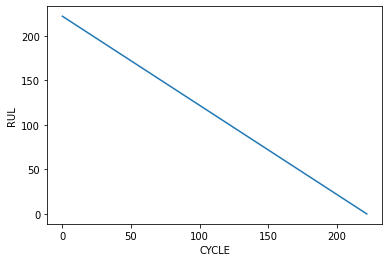

In [ ]:
a=train[train['e_id']==e_id[0]]
a['RUL'].plot(xlabel="CYCLE", ylabel="RUL")



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


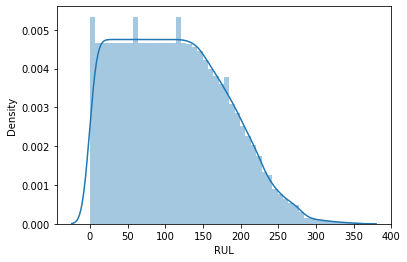

In [ ]:
sns.distplot(train['RUL'],kde=True)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,45918.0,109.396511,62.866193,1.0000,54.000000,110.0000,164.0000,218.0000
cycle,45918.0,110.307396,68.420545,1.0000,53.000000,106.0000,160.0000,357.0000
oprsetting1,45918.0,24.008881,14.793676,0.0000,10.004500,25.0015,41.9981,42.0080
oprsetting2,45918.0,0.571251,0.310935,0.0000,0.250600,0.7000,0.8400,0.8420
oprsetting3,45918.0,49.172438,32.503659,0.0000,20.000000,40.0000,80.0000,100.0000
sensor1,45918.0,472.861677,26.460179,445.0000,445.000000,462.5400,491.1900,518.6700
sensor2,45918.0,579.596770,37.391068,535.6500,549.580000,555.9850,607.3700,644.4300
sensor3,45918.0,1419.947816,106.286960,1245.4300,1352.910000,1369.1400,1499.6975,1614.6600
sensor4,45918.0,1205.669194,119.550936,1029.4900,1124.010000,1138.8700,1307.4375,1442.3600
sensor5,45918.0,8.029878,3.627125,3.9100,3.910000,7.0500,10.5200,14.6200


In [ ]:
train=train.drop([ 'sensor10', 'sensor15', 'sensor16',  'oprsetting2'], axis=1)

In [ ]:
train

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
0,1,1,10.0047,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,...,372.15,2388.13,8120.83,368,2319,100.00,28.58,17.1735,222.0,223.0
1,1,2,0.0015,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,...,521.81,2388.15,8132.87,391,2388,100.00,38.99,23.3619,221.0,223.0
2,1,3,34.9986,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,...,183.26,2387.95,8063.84,334,2223,100.00,14.83,8.8555,220.0,223.0
3,1,4,20.0031,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,...,314.84,2388.07,8052.30,364,2324,100.00,24.42,14.7832,219.0,223.0
4,1,5,42.0041,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,...,130.44,2387.89,8083.67,330,2212,100.00,10.99,6.4025,218.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,40.0,445.00,551.02,1365.27,1147.43,3.91,5.72,...,130.21,2387.39,8062.87,333,2212,100.00,10.57,6.2985,4.0,133.0
45914,218,130,42.0029,40.0,445.00,550.07,1365.55,1142.21,3.91,5.71,...,130.24,2387.28,8062.05,332,2212,100.00,10.40,6.2741,3.0,133.0
45915,218,131,41.9999,40.0,445.00,549.92,1359.21,1150.15,3.91,5.72,...,129.86,2387.33,8062.73,334,2212,100.00,10.37,6.1978,2.0,133.0
45916,218,132,35.0007,60.0,449.44,556.55,1380.05,1145.49,5.48,8.00,...,182.03,2387.56,8043.21,337,2223,100.00,14.70,8.6761,1.0,133.0


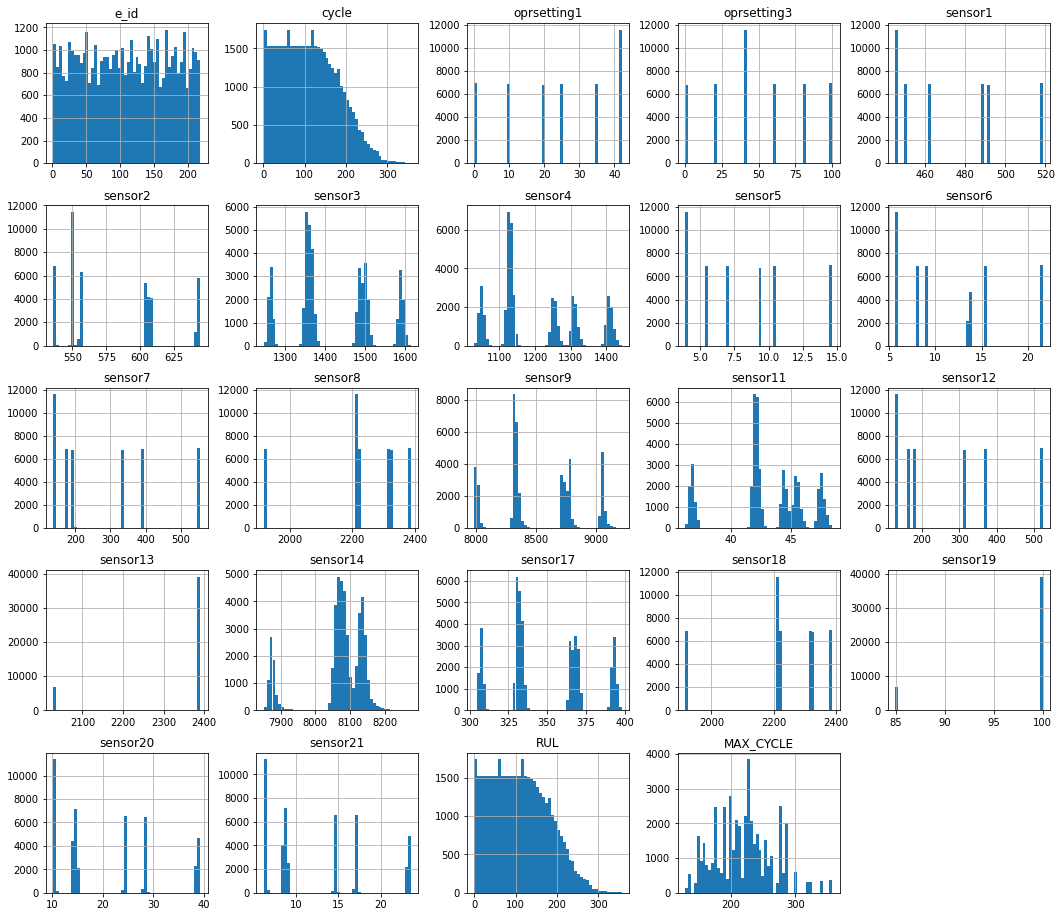

In [ ]:
train.hist(bins=50, figsize=(18,16))
plt.show()

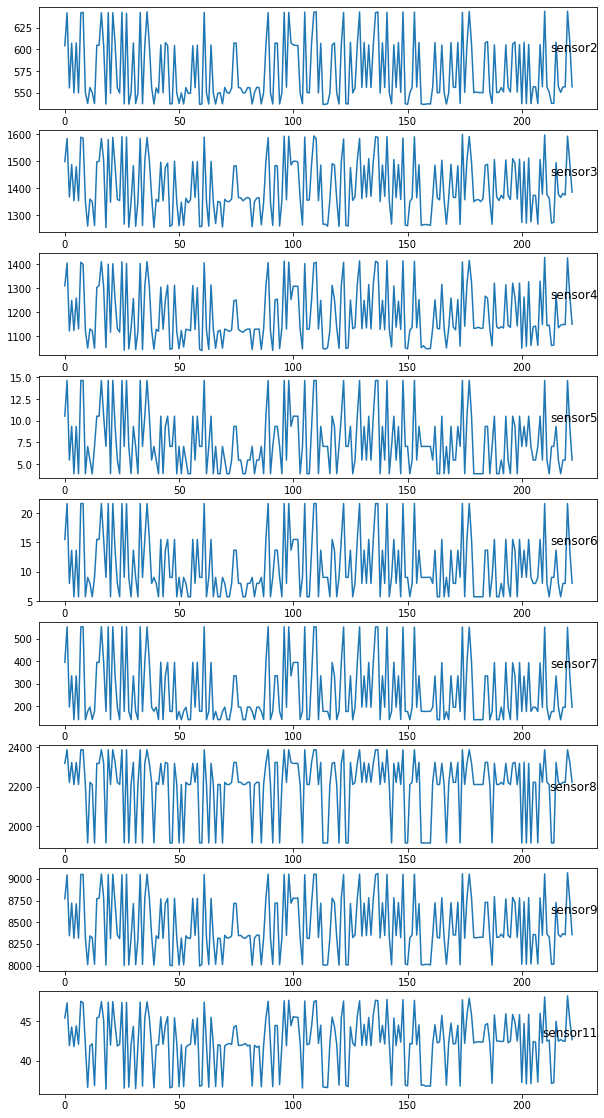

In [ ]:

values = train[train.e_id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(train.columns[group], y=0.5, loc='right')
 i += 1
plt.show()



```
# This is formatted as code
```

## **NORMALISATION**

### Normalisation done to get all the columns in a perticular range so that it is easier to train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
ntrain = train.copy()

In [ ]:
ntrain.iloc[:,2:23] = scaler.fit_transform(ntrain.iloc[:,2:23])

In [ ]:
ntrain.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,45918.0,109.396511,62.866193,1.0,54.000000,110.000000,164.000000,218.0
cycle,45918.0,110.307396,68.420545,1.0,53.000000,106.000000,160.000000,357.0
oprsetting1,45918.0,0.571531,0.352163,0.0,0.238157,0.595160,0.999764,1.0
oprsetting3,45918.0,0.491724,0.325037,0.0,0.200000,0.400000,0.800000,1.0
sensor1,45918.0,0.378196,0.359172,0.0,0.000000,0.238089,0.626985,1.0
sensor2,45918.0,0.403997,0.343731,0.0,0.128057,0.186937,0.659312,1.0
sensor3,45918.0,0.472653,0.287861,0.0,0.291092,0.335049,0.688643,1.0
sensor4,45918.0,0.426718,0.289561,0.0,0.228934,0.264926,0.673208,1.0
sensor5,45918.0,0.384676,0.338667,0.0,0.000000,0.293184,0.617180,1.0
sensor6,45918.0,0.370237,0.342884,0.0,0.000629,0.208805,0.615094,1.0


In [ ]:
ntest.iloc[:,2:22] = scaler.fit_transform(ntest.iloc[:,2:22])

In [ ]:
ntest.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,55156.0,221.334488,124.539458,1.0,116.000000,223.000000,329.000000,435.0
cycle,55156.0,77.962035,55.441894,1.0,32.000000,68.000000,115.000000,298.0
oprsetting1,55156.0,0.571454,0.351715,0.0,0.238157,0.595158,0.999764,1.0
oprsetting3,55156.0,0.490790,0.325032,0.0,0.200000,0.400000,0.800000,1.0
sensor1,55156.0,0.378179,0.358613,0.0,0.000000,0.238089,0.626985,1.0
sensor2,55156.0,0.404526,0.343892,0.0,0.128581,0.186884,0.660772,1.0
sensor3,55156.0,0.476295,0.292942,0.0,0.292592,0.335598,0.697575,1.0
sensor4,55156.0,0.431781,0.296374,0.0,0.231962,0.260724,0.687376,1.0
sensor5,55156.0,0.384574,0.338089,0.0,0.000000,0.293184,0.617180,1.0
sensor6,55156.0,0.370042,0.342321,0.0,0.000629,0.208805,0.615094,1.0


In [ ]:
pd.DataFrame(ntrain.columns).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


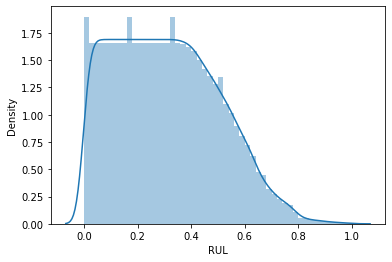

In [ ]:
sns.distplot(ntrain['RUL'],kde=True)

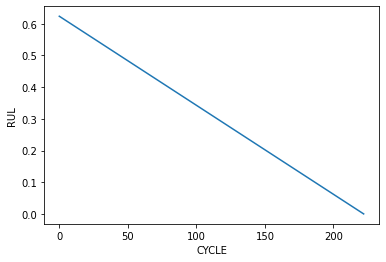

In [ ]:
a=ntrain[ntrain['e_id']==e_id[0]]
a['RUL'].plot(xlabel="CYCLE", ylabel="RUL")

In [ ]:
#splitting of data based on the engin id 70% train and 30% validation
trn = ntrain[ntrain['e_id'] < 154]
val = ntrain[ntrain['e_id'] >=154]





In [ ]:
trn.head()


,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
0,1,1,0.238162,0.2,0.597937,0.629527,0.687972,0.679294,0.617180,0.615094,...,0.616179,0.992810,0.636065,0.684211,0.854123,1.0,0.630584,0.632556,0.623596,223.0
1,1,2,0.000036,1.0,1.000000,0.978856,0.918452,0.906993,1.000000,1.000000,...,0.995815,0.992865,0.664509,0.926316,1.000000,1.0,0.988316,0.986910,0.620787,223.0
2,1,3,0.833141,0.6,0.060269,0.181743,0.332422,0.225253,0.146592,0.144025,...,0.137030,0.992314,0.501429,0.326316,0.651163,1.0,0.158076,0.156259,0.617978,223.0
3,1,4,0.476174,0.0,0.626985,0.656187,0.658153,0.532105,0.507937,0.499371,...,0.470803,0.992645,0.474167,0.642105,0.864693,1.0,0.487629,0.495685,0.615169,223.0
4,1,5,0.999907,0.4,0.000000,0.127505,0.295344,0.229685,0.000000,0.000000,...,0.003044,0.992149,0.548277,0.284211,0.627907,1.0,0.026117,0.015798,0.612360,223.0


In [ ]:
trn.tail()

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
32399,153,273,0.999964,0.4,0.000000,0.136146,0.317471,0.290116,0.000000,0.000629,...,0.002993,0.991764,0.536701,0.315789,0.627907,1.0,0.005155,0.006075,0.011236,277.0
32400,153,274,0.595170,0.8,0.238089,0.015076,0.063375,0.066922,0.293184,0.208805,...,0.087819,0.001322,0.055872,0.084211,0.000000,0.0,0.126804,0.133424,0.008427,277.0
32401,153,275,0.595287,0.8,0.238089,0.020132,0.084013,0.095090,0.293184,0.208805,...,0.088047,0.001350,0.052470,0.084211,0.000000,0.0,0.141581,0.138720,0.005618,277.0
32402,153,276,0.833363,0.6,0.060269,0.194613,0.372288,0.280573,0.146592,0.144025,...,0.134975,0.992397,0.502941,0.357895,0.651163,1.0,0.149828,0.148392,0.002809,277.0
32403,153,277,0.999876,0.4,0.000000,0.136698,0.321859,0.280330,0.000000,0.000629,...,0.000939,0.991984,0.543693,0.315789,0.627907,1.0,0.002405,0.011143,0.000000,277.0


In [ ]:
val.head()

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
32404,154,1,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.003019,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,0.477528,171.0
32405,154,2,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.997616,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,0.474719,171.0
32406,154,3,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.003475,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,0.471910,171.0
32407,154,4,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.137334,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,0.469101,171.0
32408,154,5,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.997793,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,0.466292,171.0


In [ ]:
val.tail()

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,MAX_CYCLE
45913,218,129,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.002461,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,0.011236,133.0
45914,218,130,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.002537,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,0.008427,133.0
45915,218,131,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.001573,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,0.005618,133.0
45916,218,132,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.133910,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,0.002809,133.0
45917,218,133,0.595294,0.8,0.238089,0.016639,0.079138,0.095139,0.293184,0.208805,...,0.088631,0.000083,0.018073,0.073684,0.000000,0.0,0.136082,0.136590,0.000000,133.0


In [ ]:
X_train = trn.loc[:, trn.columns != 'RUL']
y_train = trn['RUL']
X_test = val.loc[:, val.columns != 'RUL']
y_test = val['RUL']

In [ ]:
X_train

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor11,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE
0,1,1,0.238162,0.2,0.597937,0.629527,0.687972,0.679294,0.617180,0.615094,...,0.754516,0.616179,0.992810,0.636065,0.684211,0.854123,1.0,0.630584,0.632556,223.0
1,1,2,0.000036,1.0,1.000000,0.978856,0.918452,0.906993,1.000000,1.000000,...,0.909688,0.995815,0.992865,0.664509,0.926316,1.000000,1.0,0.988316,0.986910,223.0
2,1,3,0.833141,0.6,0.060269,0.181743,0.332422,0.225253,0.146592,0.144025,...,0.468801,0.137030,0.992314,0.501429,0.326316,0.651163,1.0,0.158076,0.156259,223.0
3,1,4,0.476174,0.0,0.626985,0.656187,0.658153,0.532105,0.507937,0.499371,...,0.660920,0.470803,0.992645,0.474167,0.642105,0.864693,1.0,0.487629,0.495685,223.0
4,1,5,0.999907,0.4,0.000000,0.127505,0.295344,0.229685,0.000000,0.000000,...,0.458128,0.003044,0.992149,0.548277,0.284211,0.627907,1.0,0.026117,0.015798,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,153,273,0.999964,0.4,0.000000,0.136146,0.317471,0.290116,0.000000,0.000629,...,0.532020,0.002993,0.991764,0.536701,0.315789,0.627907,1.0,0.005155,0.006075,277.0
32400,153,274,0.595170,0.8,0.238089,0.015076,0.063375,0.066922,0.293184,0.208805,...,0.070608,0.087819,0.001322,0.055872,0.084211,0.000000,0.0,0.126804,0.133424,277.0
32401,153,275,0.595287,0.8,0.238089,0.020132,0.084013,0.095090,0.293184,0.208805,...,0.077997,0.088047,0.001350,0.052470,0.084211,0.000000,0.0,0.141581,0.138720,277.0
32402,153,276,0.833363,0.6,0.060269,0.194613,0.372288,0.280573,0.146592,0.144025,...,0.513957,0.134975,0.992397,0.502941,0.357895,0.651163,1.0,0.149828,0.148392,277.0


In [ ]:
cpy = X_test.copy()

In [ ]:
X_train = X_train.drop(['e_id','cycle','MAX_CYCLE'],axis=1)
X_test = X_test.drop(['e_id','cycle','MAX_CYCLE'],axis=1)

In [ ]:
ntest_cpy = ntest

In [ ]:
ntest_cpy = ntest_cpy.drop(['e_id','cycle'],axis = 1)

In [ ]:
ntest_cpy = ntest_cpy.to_numpy()

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train= y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
cpy = cpy.to_numpy()

**LINEAR REGRESSION**

In [ ]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

**FEATURE SELECTION**

**Recursive Feature** **Elimination** - It used to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(reg)


In [ ]:
fit = rfe.fit(X_train,y_train)


In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False  True  True False False  True  True  True  True  True  True
  True False False False False  True False False]
Feature Ranking: [ 4  7  1  1  9  5  1  1  1  1  1  1  1  2 11  8  3  1 10  6]


In [ ]:
#reg.fit(X_train, y_train)

In [ ]:
y_pre = fit.predict(X_test)

In [ ]:
y_pre

array([0.46251384, 0.57833302, 0.51352756, ..., 0.04846038, 0.07089387,
       0.05681375])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.5278176443492266
MSE: 0.01663254600599008
RMSE: 0.12896722841865713
MAE: 0.10170745033447096


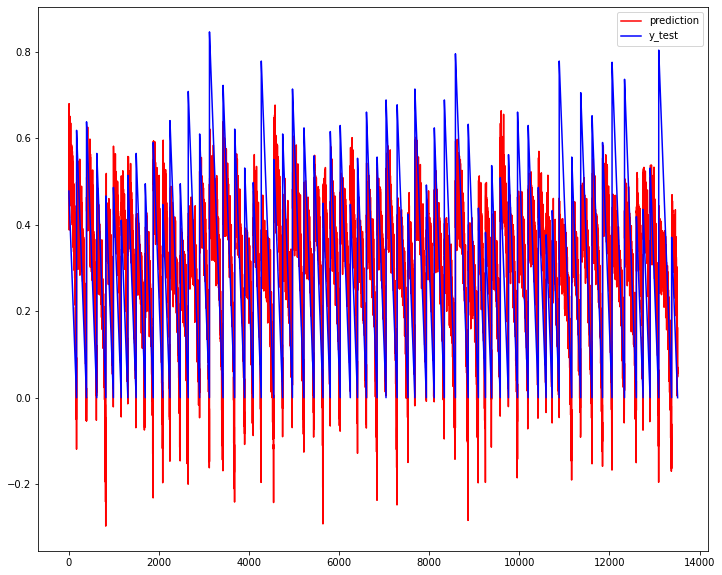

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)


In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.462514
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.578333
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.513528
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.538803
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.679635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.068833
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.162518
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.048460
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.070894


In [ ]:
#a=ncpy[ncpy['e_id']==154]
#a['y_test'].plot(xlabel="CYCLE", ylabel="RUL",color='blue')
#a['y_pre'].plot(xlabel="CYCLE", ylabel="RUL",color='red')

No handles with labels found to put in legend.


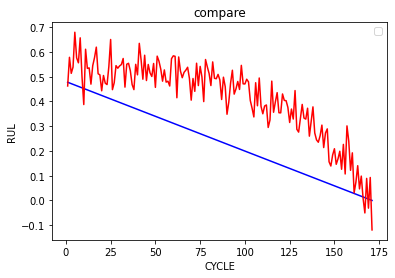

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

In [ ]:
Test_yprd = fit.predict(ntest_cpy)

In [ ]:
ntest['test_rul']=pd.DataFrame(Test_yprd)

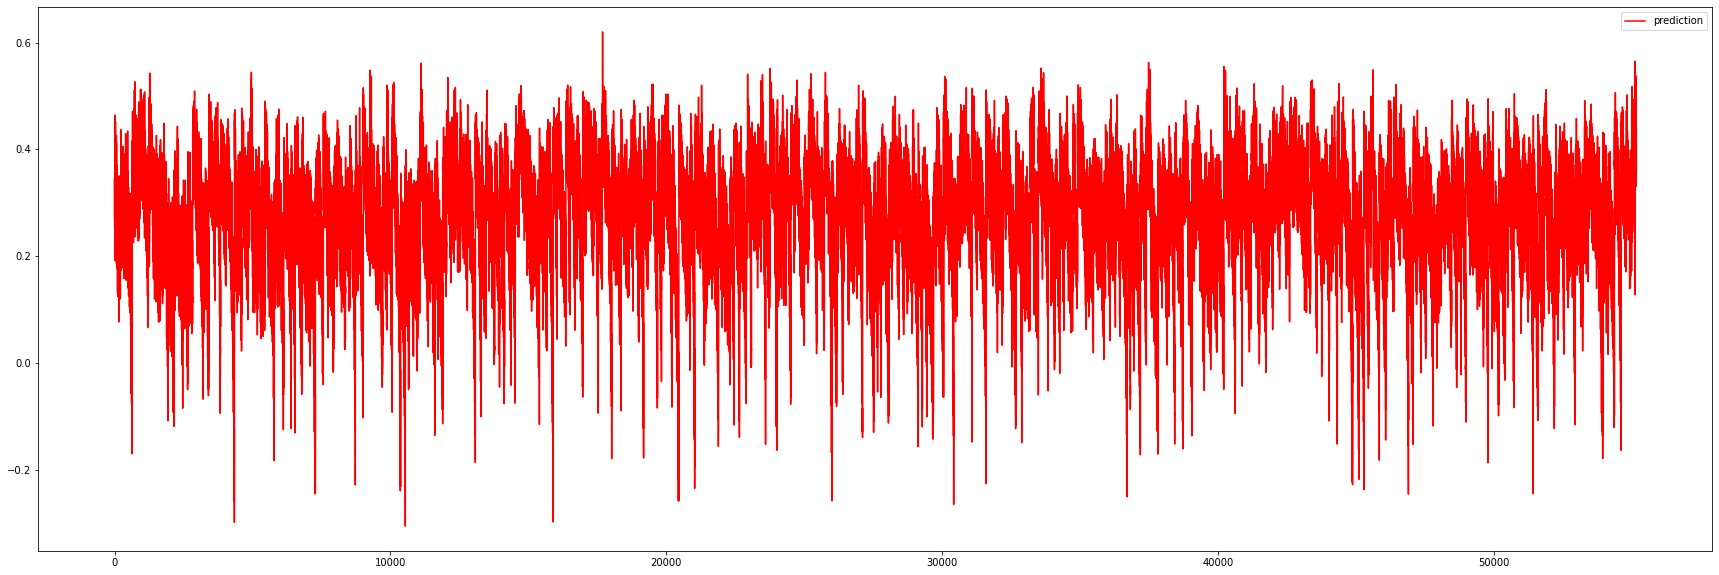

In [ ]:
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()

No handles with labels found to put in legend.


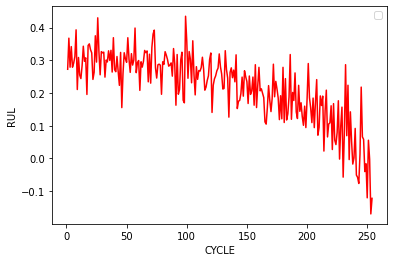

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1.0,gamma='auto', kernel='linear')


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(svr)

In [ ]:
svr.fit(X_train, y_train) 


SVR(gamma='auto', kernel='linear')

In [ ]:
y_pre = svr.predict(X_test)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False  True  True False False  True  True  True  True  True  True
  True False False False False  True False False]
Feature Ranking: [ 4  7  1  1  9  5  1  1  1  1  1  1  1  2 11  8  3  1 10  6]


In [ ]:
y_pre

array([0.4753627 , 0.47562956, 0.44147113, ..., 0.04762109, 0.07378471,
       0.06365321])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.5304208676024913
MSE: 0.01654084789400936
RMSE: 0.12861122771363845
MAE: 0.10109357492745841


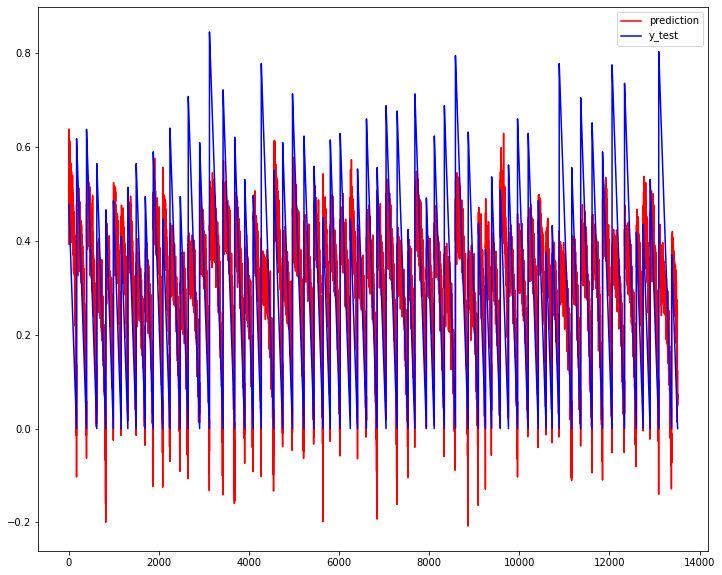

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)

In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.475363
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.475630
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.441471
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.517586
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.638539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.067848
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.124060
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.047621
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.073785


No handles with labels found to put in legend.


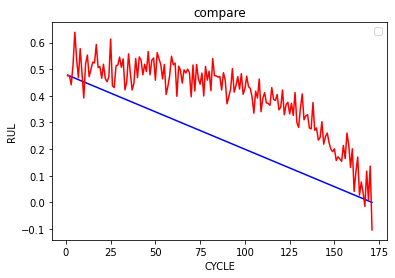

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

In [ ]:
#fit = rfe.fit(X_train, y_train)

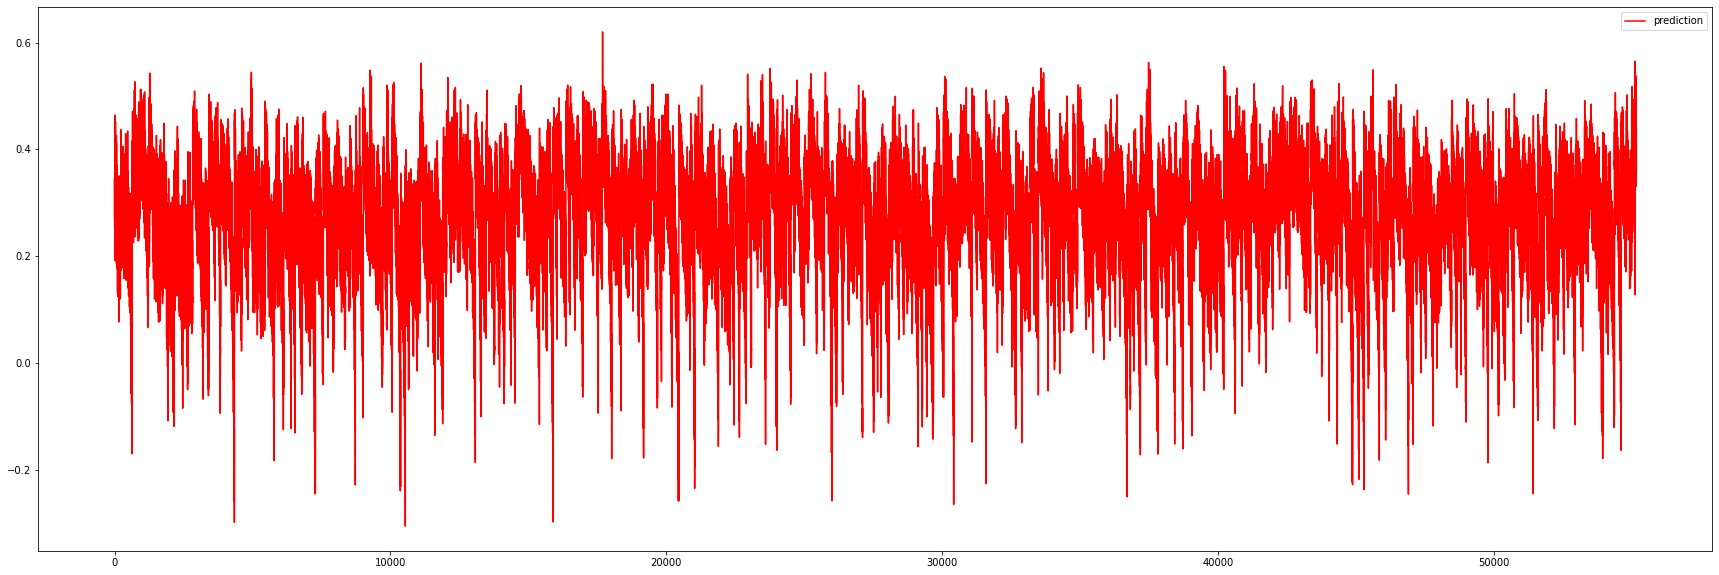

In [ ]:
Test_yprd = fit.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()

No handles with labels found to put in legend.


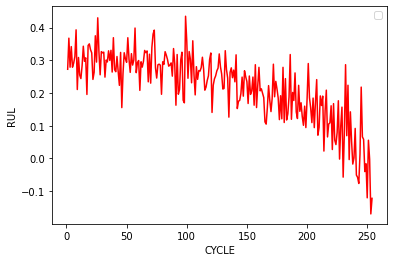

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

**RANDOM FOREST** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(regressor)

In [ ]:
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False  True  True  True False False  True False  True  True
  True  True  True False False False False  True]
Feature Ranking: [ 5  7  8  1  1  1  9  2  1  3  1  1  1  1  1  6 10 11  4  1]


In [ ]:
y_pre = fit.predict(X_test)

In [ ]:
y_pre

array([0.5388764 , 0.49623596, 0.49786517, ..., 0.01544944, 0.02235955,
       0.01227528])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.5912280425964218
MSE: 0.014398925131590731
RMSE: 0.11999552129804983
MAE: 0.08892158444093766


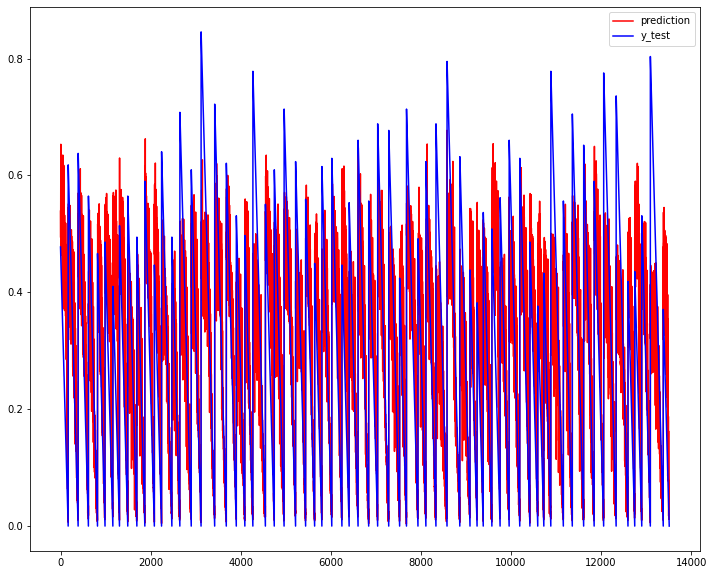

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)

In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.538876
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.496236
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.497865
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.493764
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.591742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.011461
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.022303
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.015449
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.022360


No handles with labels found to put in legend.


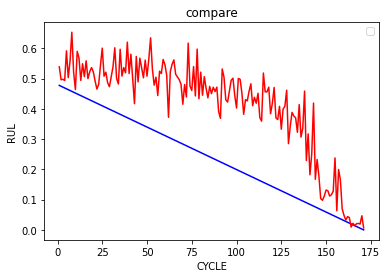

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

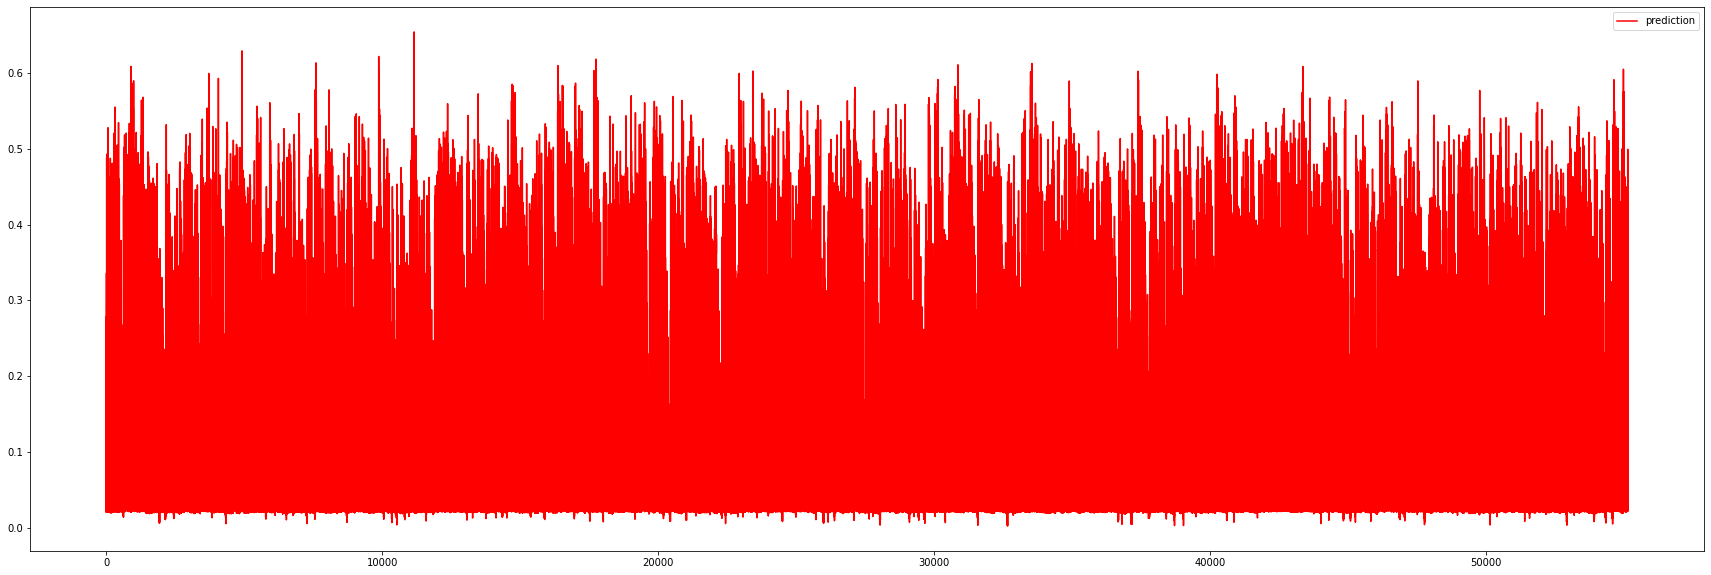

In [ ]:
Test_yprd = fit.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()


No handles with labels found to put in legend.


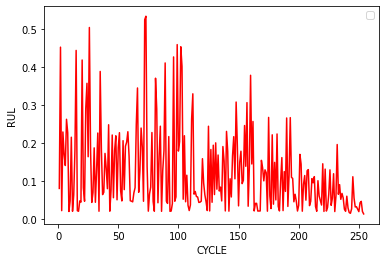

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

**GRADIENT BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(reg)

In [ ]:
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False  True  True False False  True  True  True  True  True  True
  True False False False False  True False False]
Feature Ranking: [ 4  7  1  1  9  5  1  1  1  1  1  1  1  2 11  8  3  1 10  6]


In [ ]:
y_pre = fit.predict(X_test)

In [ ]:
y_pre

array([0.46251384, 0.57833302, 0.51352756, ..., 0.04846038, 0.07089387,
       0.05681375])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.5278176443492266
MSE: 0.01663254600599008
RMSE: 0.12896722841865713
MAE: 0.10170745033447096


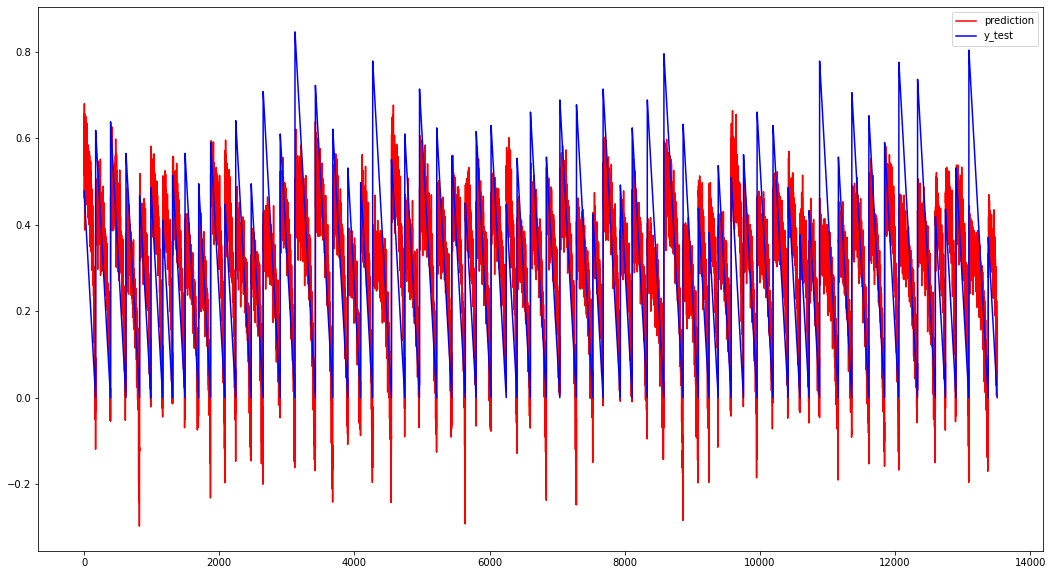

In [ ]:
fig = plt.figure(figsize=(18,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)

In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.462514
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.578333
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.513528
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.538803
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.679635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.068833
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.162518
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.048460
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.070894


No handles with labels found to put in legend.


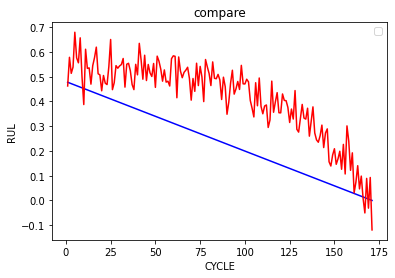

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

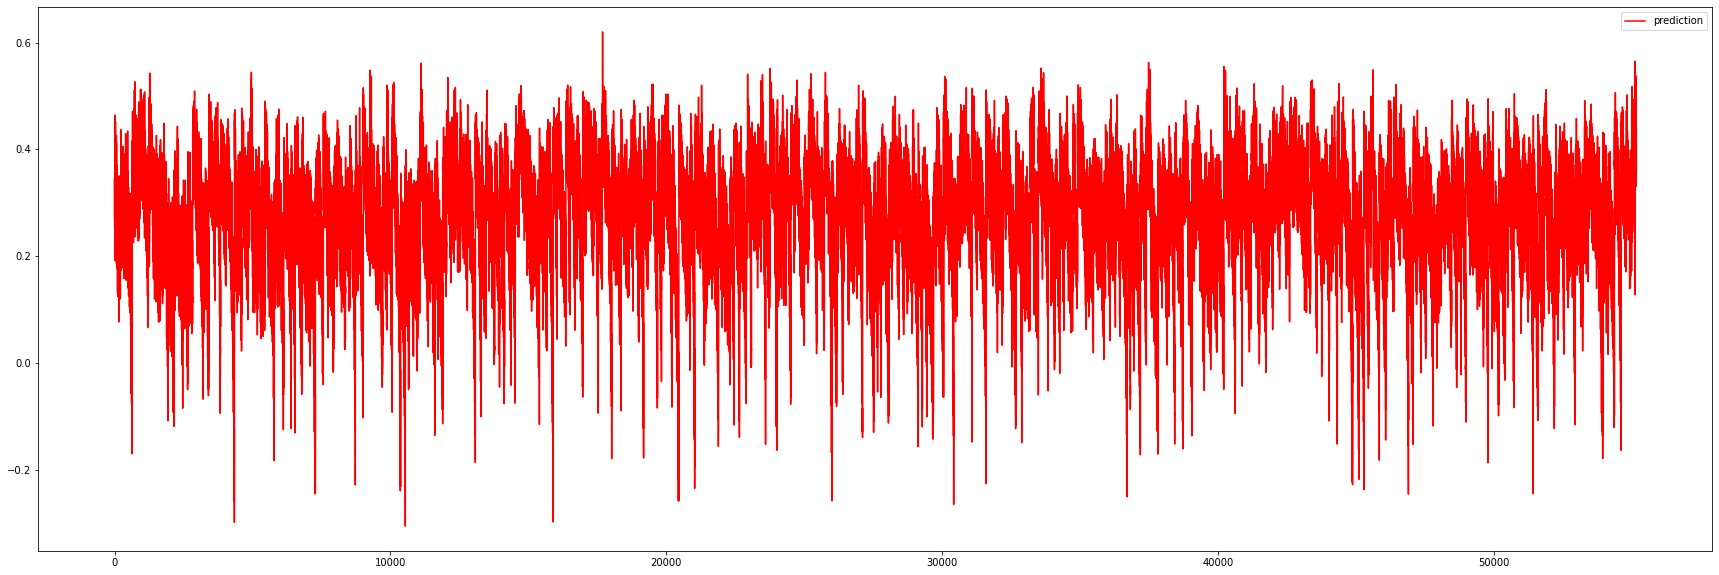

In [ ]:
Test_yprd = fit.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()


No handles with labels found to put in legend.


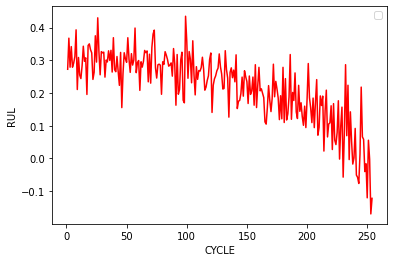

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor() 

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(regressor)

In [ ]:
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False  True  True  True False False  True False  True  True
  True  True  True False False False False  True]
Feature Ranking: [ 4 10  9  1  1  1  8  2  1  3  1  1  1  1  1  6  7 11  5  1]


In [ ]:
y_pre = fit.predict(X_test)

In [ ]:
y_pre

array([0.5505618 , 0.44662921, 0.60955056, ..., 0.03089888, 0.04775281,
       0.01123596])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.1882354027584371
MSE: 0.02859427475015646
RMSE: 0.16909841734965014
MAE: 0.12269028539691673


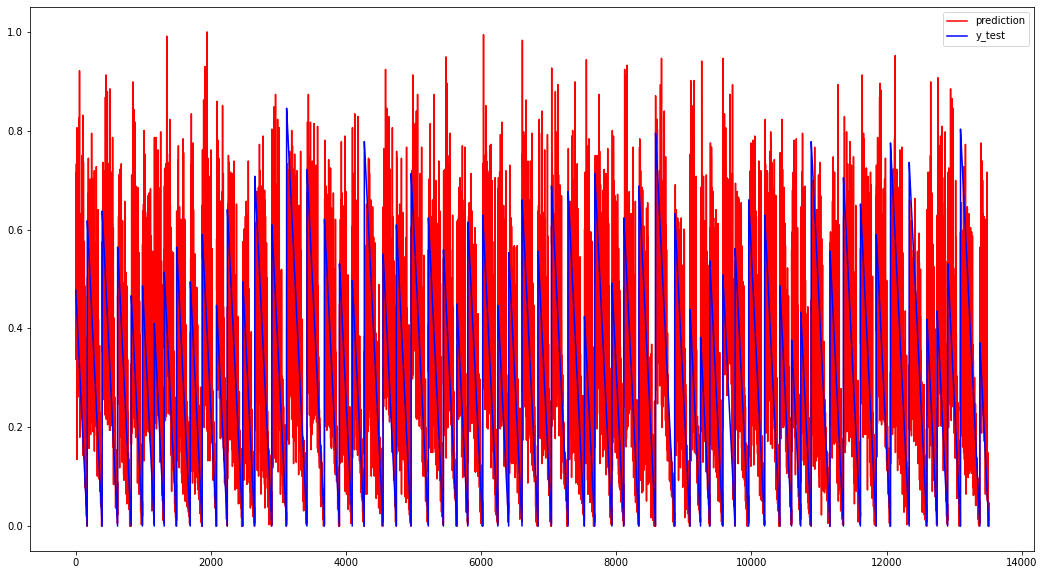

In [ ]:
fig = plt.figure(figsize=(18,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)

In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.550562
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.446629
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.609551
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.435393
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.471910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.002809
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.005618
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.030899
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.047753


No handles with labels found to put in legend.


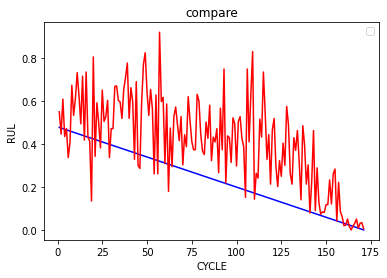

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

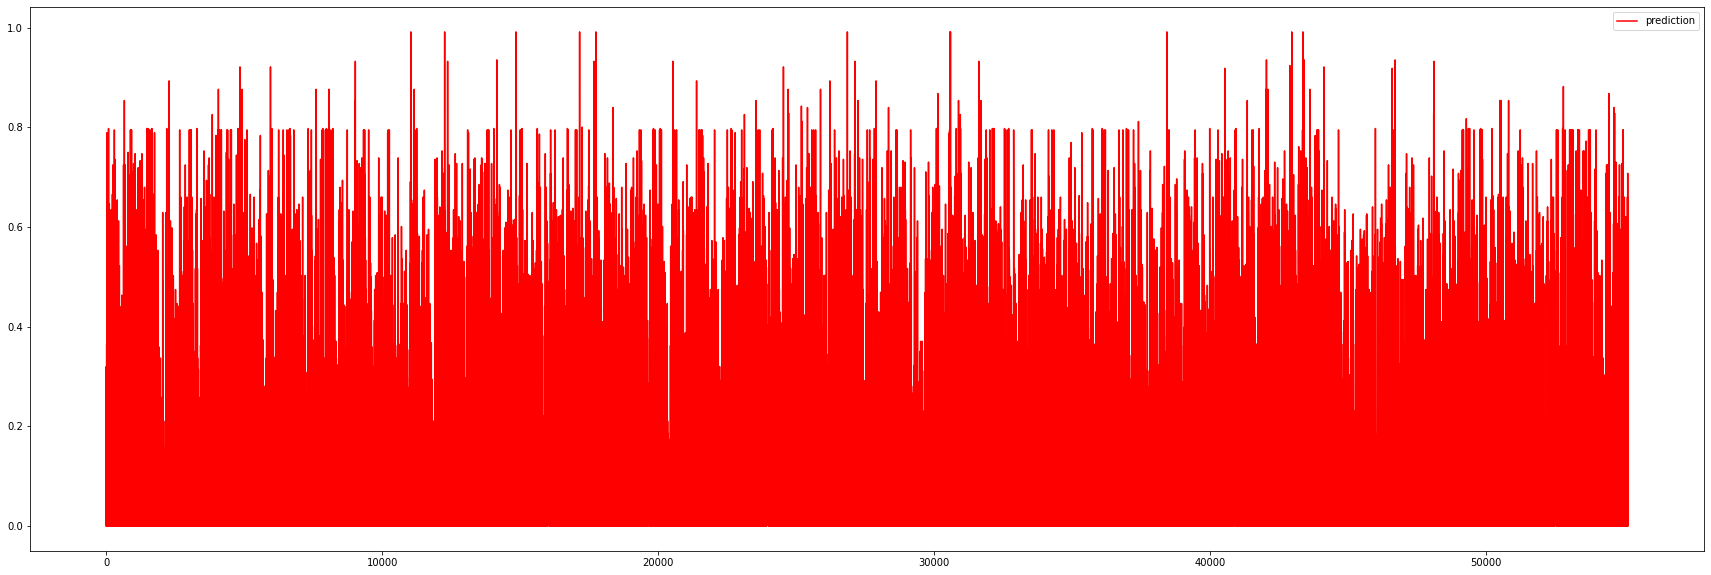

In [ ]:
Test_yprd = fit.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()



No handles with labels found to put in legend.


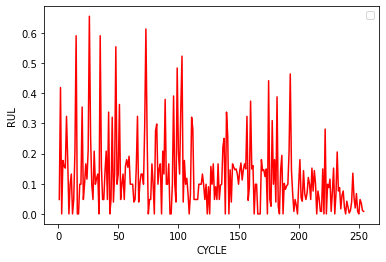

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

**K NEAREST NEIGHBOURS**

In [ ]:

from sklearn import neighbors



Implementing the k nearest neighbours

In [ ]:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(regressor)



Fitting the model on selected features


In [ ]:
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False  True  True  True False False  True False  True  True
  True  True  True False False False False  True]
Feature Ranking: [ 4  8  7  1  1  1  9  2  1  3  1  1  1  1  1  6 10 11  5  1]


In [ ]:
y_pre = fit.predict(X_test)

In [ ]:
y_pre

array([0.5505618 , 0.46348315, 0.60955056, ..., 0.03089888, 0.03089888,
       0.01123596])

Calculating the errors

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_pre)
MSE = mean_squared_error(y_test,y_pre)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_pre))
MAE = mae(y_test,y_pre)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.19047878309715016
MSE: 0.028515252045800736
RMSE: 0.1688645967803812
MAE: 0.1224951070300795


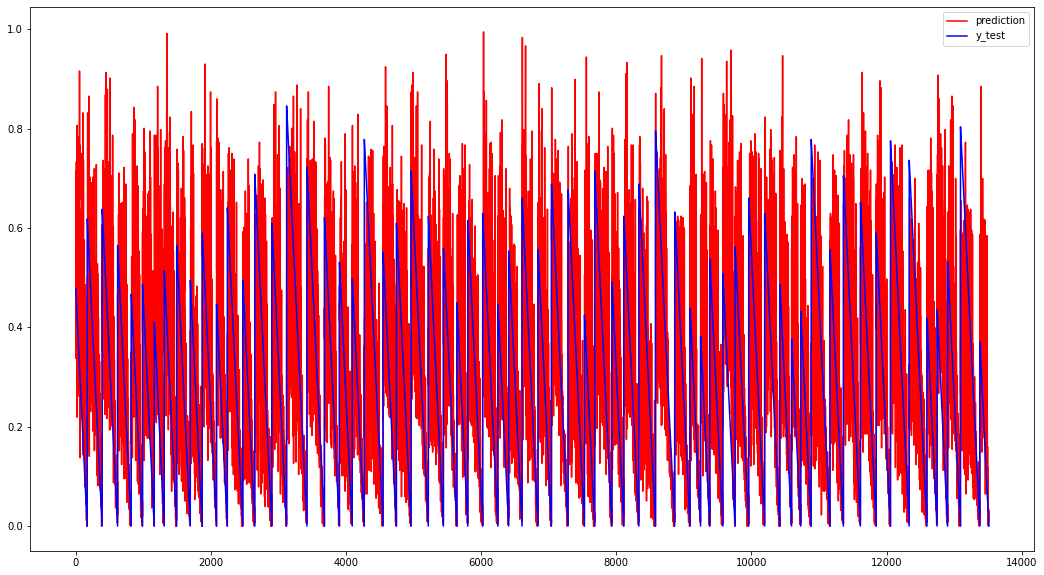

In [ ]:
fig = plt.figure(figsize=(18,10))
plt.plot(y_pre,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21','MAX_CYCLE'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_pre)

In [ ]:
ncpy

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21,MAX_CYCLE,y_test,y_pre
0,154.0,1.0,0.999855,0.4,0.000000,0.121622,0.273055,0.195316,0.000000,0.000629,...,0.992783,0.554348,0.273684,0.627907,1.0,0.013402,0.010187,171.0,0.477528,0.550562
1,154.0,2.0,0.000002,1.0,1.000000,0.978213,0.943856,0.895972,1.000000,0.999371,...,0.992535,0.683409,0.936842,1.000000,1.0,0.990034,0.989092,171.0,0.474719,0.463483
2,154.0,3.0,0.999957,0.4,0.000000,0.126310,0.287544,0.232180,0.000000,0.000000,...,0.992452,0.547969,0.284211,0.627907,1.0,0.011684,0.023019,171.0,0.471910,0.609551
3,154.0,4.0,0.833258,0.6,0.060269,0.178158,0.324513,0.218059,0.146592,0.144025,...,0.992480,0.507265,0.305263,0.651163,1.0,0.161512,0.160680,171.0,0.469101,0.477528
4,154.0,5.0,0.000017,1.0,1.000000,0.975731,0.912791,0.867028,1.000000,1.000000,...,0.992204,0.668100,0.915789,1.000000,1.0,0.985911,0.996507,171.0,0.466292,0.471910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,218.0,129.0,0.999967,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,0.000629,...,0.990772,0.499138,0.315789,0.627907,1.0,0.011684,0.009843,133.0,0.011236,0.002809
13510,218.0,130.0,0.999879,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,0.000000,...,0.990469,0.497201,0.305263,0.627907,1.0,0.005842,0.008446,133.0,0.008427,0.016854
13511,218.0,131.0,0.999807,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,0.000629,...,0.990607,0.498807,0.326316,0.627907,1.0,0.004811,0.004077,133.0,0.005618,0.030899
13512,218.0,132.0,0.833191,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,0.144025,...,0.991240,0.452692,0.357895,0.651163,1.0,0.153608,0.145987,133.0,0.002809,0.030899


No handles with labels found to put in legend.


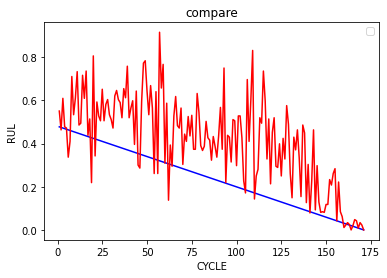

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

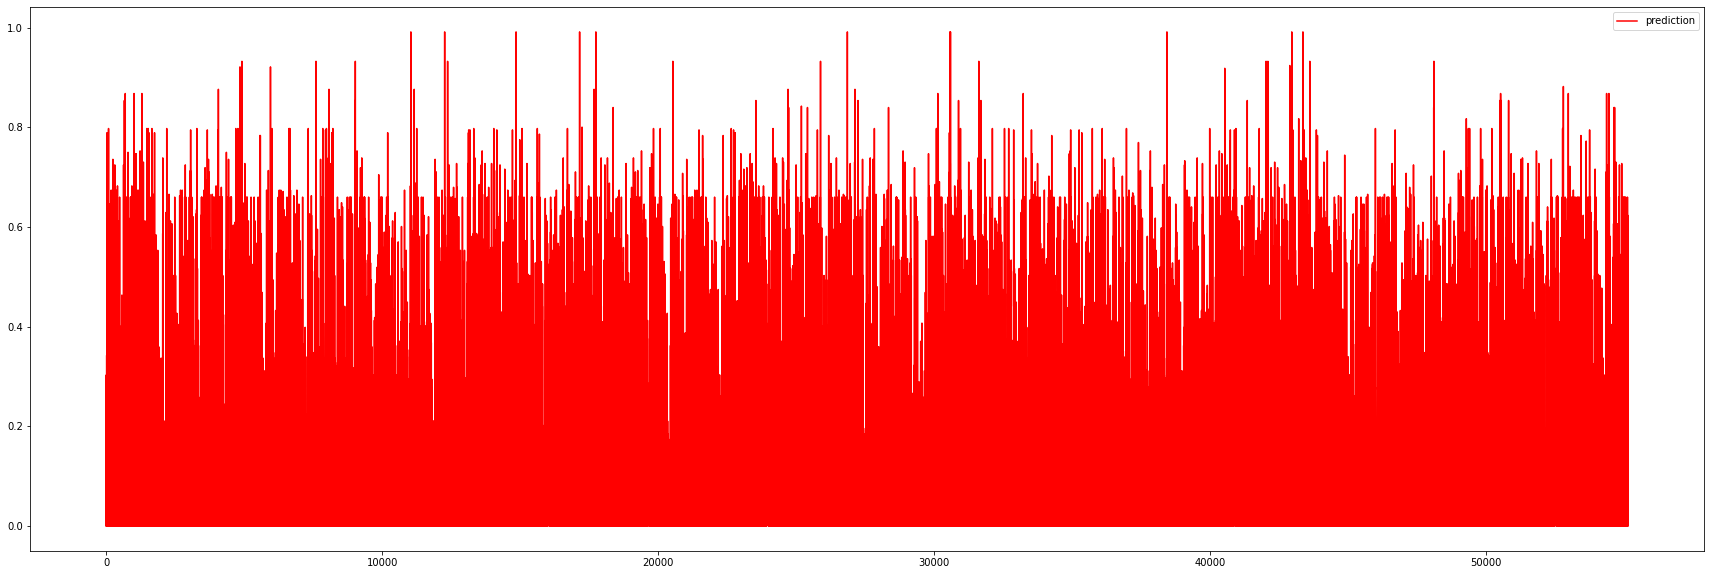

In [ ]:
Test_yprd = fit.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()


No handles with labels found to put in legend.


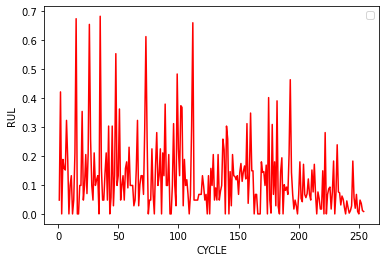

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()